# <span style="color:darkblue"> Lecture 20 - Time Data </span>

<font size = "5">

In  the last lecture we ...
- Completed the module on SQL
- Learned about escape characters


In  this lecture we will ...

- Process time data in Python
- Learn about wildcards

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Import libraries

In [1]:
# "pandas" processes datasets
# "maplotlib.pyplot" generates graphs
# "maplotlib.dates" has advanced options for plotting dates
# "datetime" handles date information

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

<font size = "5">

Import data

In [2]:
financial = pd.read_csv("data_raw/financial.csv")

In [4]:
financial

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10
...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03


<font size = "5">

"Parse" time columns

In [3]:
# Convert string column to datetime format
# If the date format is simple, you can also parse on input as
# financial = pd.read_csv("data_raw/financial.csv",parse_dates = ["date"]
# See advanced options for parsing further in the lecture...

financial["date"] = pd.to_datetime(financial["date_str"])

In [6]:
financial["date_str"]

0        4/4/2018
1        4/5/2018
2        4/6/2018
3        4/9/2018
4       4/10/2018
          ...    
1300    3/29/2023
1301    3/30/2023
1302    3/31/2023
1303     4/3/2023
1304     4/4/2023
Name: date_str, Length: 1305, dtype: object

In [7]:
type(financial['date_str'][0])

str

In [5]:
financial["date"]

0      2018-04-04
1      2018-04-05
2      2018-04-06
3      2018-04-09
4      2018-04-10
          ...    
1300   2023-03-29
1301   2023-03-30
1302   2023-03-31
1303   2023-04-03
1304   2023-04-04
Name: date, Length: 1305, dtype: datetime64[ns]

In [8]:
type(financial["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

<font size = "5">

Check Types

In [9]:
# Standard data types are "int", "str", "float", and "bool"
# There is also a "datetime" types

financial.dtypes

date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "5">

Visualize time data

Text(0.5, 1.0, 'The evolution of the stock market')

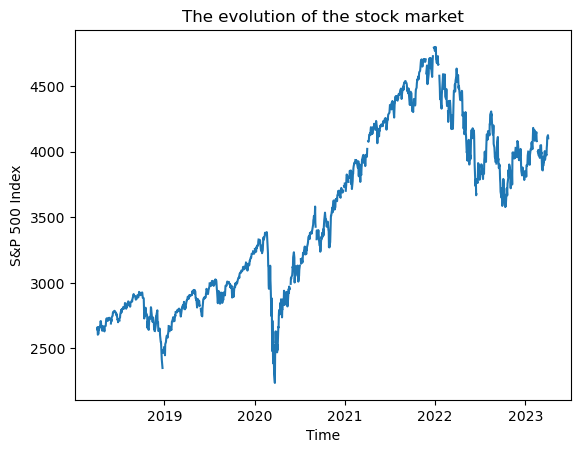

In [10]:
# plt.plot() is used to create line plots
# The first two arguments are column names for the (x,y) data
# The third argument is the data
# Make sure that the data is sorted, since the lines will be connected
# based on the order of the dataset

plt.plot("date", "sp500",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500 Index")
plt.title("The evolution of the stock market (SnP)")


<font size = "5">

S&P 500 tracks the average performance of <br>
of the largest companies in the US stock market

$\quad$ https://en.wikipedia.org/wiki/S%26P_500 <br>
$\quad$ https://fred.stlouisfed.org/series/SP500

<font size = "5">

Try it yourself!

- Generate a line plot which has the Dow Jones <br>
Industrial Index ("djia") on the y-axis and <br>
"date" on the x-axis.

Text(0.5, 1.0, 'The evolution of the stock market')

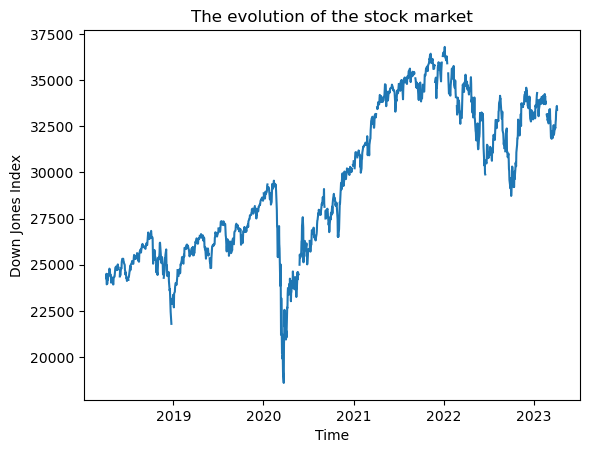

In [11]:
# Write your own code

plt.plot("date", "djia",
          data = financial.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("Down Jones Industrial Average")
plt.title("The evolution of the stock market (dow)")

# <span style="color:darkblue"> II. Dates + Wild Cards  </span>

<font size = "5">

Convert to string (a)


- A wildcard ```%``` is used to denote date formats
- Useful when working with text data

$\quad$ <img src="figures/wildcards_fig1.png" alt="drawing" width="300"/>

In [13]:
financial["date"].dt.strftime('%Y')

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
1300    2023
1301    2023
1302    2023
1303    2023
1304    2023
Name: date, Length: 1305, dtype: object

In [15]:
financial["date"].dt.strftime('%d')

0       04
1       05
2       06
3       09
4       10
        ..
1300    29
1301    30
1302    31
1303    03
1304    04
Name: date, Length: 1305, dtype: object

In [17]:
# "String from time" .dt.strftime()
# The first argument needs to be a datetime type 
# The second argument is the format you want to use
# Note: "dt" stands for datatime

financial["month_str"] = financial["date"].dt.strftime("%m")
financial["week_str"]  = financial["date"].dt.strftime("%W")
print(financial["month_str"])
print(financial["week_str"])


0       04
1       04
2       04
3       04
4       04
        ..
1300    03
1301    03
1302    03
1303    04
1304    04
Name: month_str, Length: 1305, dtype: object
0       14
1       14
2       14
3       15
4       15
        ..
1300    13
1301    13
1302    13
1303    14
1304    14
Name: week_str, Length: 1305, dtype: object


<font size = "5">

Convert to string (b)

$\quad$ <img src="figures/wildcards_fig2.png" alt="drawing" width="400"/>

In [8]:
financial["monthname"]   =  financial["date"].dt.strftime("%B")
financial["weekdayname"] =  financial["date"].dt.strftime("%A")

<font size = "5">

Personalized format

In [25]:
# Insert wildcards inside custom strings
# Internally it will "fill-in-the-blank" with the corresponding information
# You can use commas, dashes (--), slash (/) or other characters

message_monthname =  financial["date"].dt.strftime("This is the month of %B")
message_monthday  =  financial["date"].dt.strftime("The day of the week is %A")
message_yearmonth =  financial["date"].dt.strftime("%Y-%m")
print(message_monthday[3])
print(message_monthname[3])
print(message_yearmonth[3])


The day of the week is Monday
This is the month of April
2018-04


<font size = "5">

Try it yourself!

- Create a new column called "date_test" <br>
  which has the format using ```.dt.strftime()```
  
$\quad$ ```Monday, December 31, 2023 ```

In [30]:
# Write your own code
financial["day_date"] = financial["date"].dt.strftime('%A, %B %d, %Y')
financial["day_date"]

0       Wednesday, April 04, 2018
1        Thursday, April 05, 2018
2          Friday, April 06, 2018
3          Monday, April 09, 2018
4         Tuesday, April 10, 2018
                  ...            
1300    Wednesday, March 29, 2023
1301     Thursday, March 30, 2023
1302       Friday, March 31, 2023
1303       Monday, April 03, 2023
1304      Tuesday, April 04, 2023
Name: day_date, Length: 1305, dtype: object

# <span style="color:darkblue"> III. Data Operations </span>

<font size = "5">

Parsing + wild cards

$\quad$ <img src="figures/wildcards_fig3.png" alt="drawing" width="400"/>

In [31]:
financial
#look at date_ex1 from string into date

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,month_str,week_str,day_date
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,04,14,"Wednesday, April 04, 2018"
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,04,14,"Thursday, April 05, 2018"
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,04,14,"Friday, April 06, 2018"
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,04,15,"Monday, April 09, 2018"
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,04,15,"Tuesday, April 10, 2018"
...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,03,13,"Wednesday, March 29, 2023"
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,03,13,"Thursday, March 30, 2023"
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,03,13,"Friday, March 31, 2023"
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,04,14,"Monday, April 03, 2023"


In [ ]:
#pd.to_datetime(financial["date_ex1"], format = %B %d %Y)

In [37]:
# Combine wildcards + characters depending on the input
# Can include spaces, commas, "/", "-" or any other formatting
# Be careful to include the wildcar letters in upper or lower case 
# depending on the intended format 

financial["date_ex1_fix"] = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
financial["date_ex2_fix"] = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")


In [36]:
print(financial["date_ex1"])
print(financial["date_ex1_fix"])

0       April 04 2018
1       April 05 2018
2       April 06 2018
3       April 09 2018
4       April 10 2018
            ...      
1300    March 29 2023
1301    March 30 2023
1302    March 31 2023
1303    April 03 2023
1304    April 04 2023
Name: date_ex1, Length: 1305, dtype: object
0      2018-04-04
1      2018-04-05
2      2018-04-06
3      2018-04-09
4      2018-04-10
          ...    
1300   2023-03-29
1301   2023-03-30
1302   2023-03-31
1303   2023-04-03
1304   2023-04-04
Name: date_ex1_fix, Length: 1305, dtype: datetime64[ns]


**Does the following line of code work?** ```pd.to_datetime(financial["date_ex1"], format = "%A, %Y-%m-%d")```

<font size = "5">

Period grouping

In [39]:
# In "freq" specify the letter for the level of aggregation
# year (y), month (m), week (w), day(d)
# There are also more advanced options! See documentation

month_config = pd.Grouper(key='date', freq='m')
month_config # THIS IS ESSENTIALLY A FUNCTION

TimeGrouper(key='date', freq=<MonthEnd>, axis=0, sort=True, dropna=True, closed='right', label='right', how='mean', convention='e', origin='start_day')

In [40]:
financial.groupby(month_config).agg(sp500_mean = ("sp500", "mean"))

,sp500_mean
date,
2018-04-30,2659.463158
2018-05-31,2701.493636
2018-06-30,2754.352857
2018-07-31,2793.643333
2018-08-31,2857.820435
...,...
2022-12-31,3912.380952
2023-01-31,3960.656500
2023-02-28,4079.684737


In [41]:
financial.groupby(month_config).agg(sp500_mean = ("sp500", "mean")).reset_index()

,date,sp500_mean
0,2018-04-30,2659.463158
1,2018-05-31,2701.493636
2,2018-06-30,2754.352857
3,2018-07-31,2793.643333
4,2018-08-31,2857.820435
...,...,...
56,2022-12-31,3912.380952
57,2023-01-31,3960.656500
58,2023-02-28,4079.684737
59,2023-03-31,3968.559130


<font size = "5">

Aggregate by period

In [42]:
# Group on the period column
# We use a wrapper () to split the command into multiple lines
# The ".reset_index()" option ensures that the grouper is
# converted to a column. This is important for plotting.
# There's a lot of options to 

monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())

<font size = "5">

Plot aggregate data

Text(0.5, 1.0, 'Monthly average stock market performance')

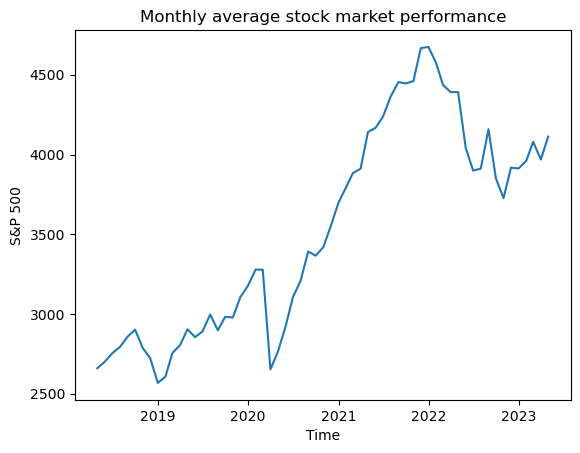

In [43]:
plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Monthly average stock market performance")

<font size = "5">

Try it yourself!

- Practice ```pd.to_datetime()```
- Parse the column "data_ex3"
- Take a close look at the formatting

HINT: Refer to the table of wildcards <br>
 in the previous section


In [44]:
# Write your own code
financial["date_ex3_fix"] = pd.to_datetime(financial["date_ex3"], format = '%d-%b-%y')

<font size = "5">



<font size = "5">

Try it yourself!

- Compute an aggregate dataset which computes the standard <br>
deviation of the S&P 500 at the weekly level.
- Generate a line plot with your results


In [45]:
# Write your own code
week_config = pd.Grouper(key='date', freq='w')

In [48]:
std_w_sp500 = financial.groupby(week_config).agg(sp_500_std = ('sp500', 'std')).reset_index()
std_w_sp500

,date,sp_500_std
0,2018-04-08,29.872305
1,2018-04-15,20.246041
2,2018-04-22,17.033965
3,2018-04-29,17.694402
4,2018-05-06,13.747390
...,...,...
257,2023-03-12,72.372058
258,2023-03-19,38.469249
259,2023-03-26,25.800050
260,2023-04-02,56.780195


ValueError: 'std_w_sp500' is neither a data key nor a valid format string (unrecognized character 't')

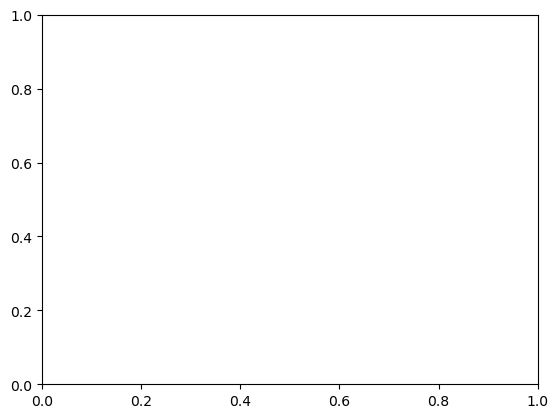

In [51]:
plt.plot("date","std_w_sp500",
          data = std_w_sp500)
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("weekly standard deviation of stock market performance")

# <span style="color:darkblue"> IV. Additional Material </span>

<font size = "5">

Full list of wild cards:

- More fine-grained, e.g. microseconds, etc.
- Other formats, e.g. time zone, "AM/PM", etc.

https://www.w3schools.com/python/python_datetime.asp